In [1]:
from fastai.tabular import *

In [2]:
path = Path("/home/jupyter/data/bimbo")

In [3]:
df = pd.read_feather('tmp/df_merge')
df['Semana'] = df['Semana']-8

In [4]:
df['is_valid'] = df['Semana'] >= 0

In [5]:
dep_var = 'Demanda_uni_equil'
cat_names = ['Canal_ID', 'Ruta_SAK', 'geo', 'NombreProducto', 'NombreCliente']
cont_names = ['Semana', 'Venta_uni_hoy', 'Venta_hoy', 'Dev_uni_proxima', 'Dev_proxima']
df = df[cat_names + cont_names + [dep_var, 'is_valid']]

procs = [FillMissing, Categorify, Normalize]

In [6]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_from_df(col='is_valid')
                           .label_from_df(cols=dep_var, label_cls=FloatList)
                           .databunch(bs=100000))

In [11]:
learn = tabular_learner(data, layers=[200,100], metrics=root_mean_squared_error)

In [20]:
learn.lr_find(start_lr=1e-05, end_lr=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


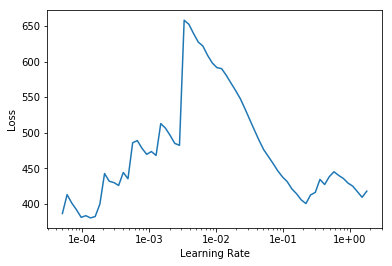

In [21]:
learn.recorder.plot()

In [10]:
learn.fit(1, 3e-2)

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #2 'other'

In [ ]:
learn.save('naive-neural-200-100')